<a href="https://colab.research.google.com/github/rahulkd/Deep_learning/blob/master/Mnist_classifier_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
n_train = mnist.train.num_examples 
n_validation = mnist.validation.num_examples 
n_test = mnist.test.num_examples

print("Training_examples: ",n_train)
print("Validation_examples: ",n_validation)
print("Test examples: ",n_test)

n_x = mnist.train.images.shape[1]
n_y = mnist.train.labels.shape[1]

print("Training_data shape: ",mnist.train.images.shape)
print("Training_labels shape: ",mnist.train.labels.shape)

print("Validation_data shape: ",mnist.validation.images.shape)
print("valiation_labels shape: ",mnist.validation.labels.shape)

print("Test_data shape: ",mnist.test.images.shape)
print("Test_labels shape: ",mnist.test.labels.shape)

Training_examples:  55000
Validation_examples:  5000
Test examples:  10000
Training_data shape:  (55000, 784)
Training_labels shape:  (55000, 10)
Validation_data shape:  (5000, 784)
valiation_labels shape:  (5000, 10)
Test_data shape:  (10000, 784)
Test_labels shape:  (10000, 10)


In [0]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
n_hidden3 = 128 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)

layers_NN = [n_input,n_hidden1,n_hidden2,n_hidden3,n_output]

In [0]:
def initialize_parameters():
    
    tf.set_random_seed(1)
    '''
    weights = {
    'W1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'W2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'W3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}
    
    biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}
    '''
    
    weights = {
    'W1': tf.get_variable('W1',[n_input,n_hidden1],initializer=tf.contrib.layers.xavier_initializer(seed=0)),
    'W2': tf.get_variable('W2',[n_hidden1,n_hidden2],initializer=tf.contrib.layers.xavier_initializer(seed=0)),
    'W3': tf.get_variable('W3',[n_hidden2,n_hidden3],initializer=tf.contrib.layers.xavier_initializer(seed=0)),
    'out':tf.get_variable('W4',[n_hidden3,n_output],initializer=tf.contrib.layers.xavier_initializer(seed=0)),
}
    
    biases = {
    'b1': tf.get_variable("b1", [1,n_hidden1], initializer=tf.zeros_initializer()),
    'b2': tf.get_variable("b2", [1,n_hidden2], initializer=tf.zeros_initializer()),
    'b3': tf.get_variable("b3", [1,n_hidden3], initializer=tf.zeros_initializer()),
    'out':tf.get_variable("b4", [1,n_output], initializer=tf.zeros_initializer())
}
    
    parameters = {'weights': weights,
                  'biases' : biases
                 }
    
    
    return parameters 

In [0]:
def forward_propagation(X,parameters,keep_prob):
    
    weights = parameters['weights']
    biases = parameters['biases']
    
    Z1 = tf.add(tf.matmul(X, weights['W1']), biases['b1'])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(A1, weights['W2']), biases['b2'])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(A2, weights['W3']), biases['b3'])
    A3 = tf.nn.relu(Z3)
    layer_drop = tf.nn.dropout(A3, keep_prob)
    output_layer = tf.matmul(layer_drop, weights['out']) + biases['out']

    return output_layer

In [0]:
def compute_cost(output_layer, Y,parameters,lambd):
    
    weights = parameters['weights']
    biases = parameters['biases']
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=Y))
    # Compute L2 loss
    #reg = tf.nn.l2_loss(weights['W1'])+tf.nn.l2_loss(weights['W2'])+tf.nn.l2_loss(weights['W3']+tf.nn.l2_loss(weights['out'])
    #cost = tf.reduce_mean(cost+reg*lambd)
    return cost

In [0]:
def model(learning_rate,num_epochs, minibatch_size,L2_lambd, print_cost=True):
    
    m = n_train
    costs = []  # To keep track of the cost
    
    #tf.set_random_seed(1)
    
    # Create Placeholders of shape (n_x, n_y)
    X = tf.placeholder(tf.float32, shape=(None,n_x))
    Y = tf.placeholder(tf.float32, shape=(None,n_y))
    keep_prob = tf.placeholder(tf.float32)

    # Initialize parameters
    parameters = initialize_parameters()

    # Forward propagation: Build the forward propagation in the tensorflow graph
    output_layer = forward_propagation(X, parameters,keep_prob)

    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(output_layer, Y,parameters,L2_lambd)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)

        # Do the training loop
        for epoch in range(num_epochs):

            minibatches_cost = []
            num_minibatches = m//minibatch_size
            for i in range(num_minibatches):
              
              minibatch_X,minibatch_Y = mnist.train.next_batch(minibatch_size)    # Get one batch of training data
              
              # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
              _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y,keep_prob:0.5})
              minibatches_cost.append(minibatch_cost)
              
              
            epoch_cost = np.mean(minibatches_cost)
            
            # Calculate the correct predictions
            correct_prediction = tf.equal(tf.argmax(output_layer,axis=1), tf.argmax(Y,axis=1))
            # Calculate accuracy on the test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

            # Print the cost every epoch
            print("Cost after epoch %i: %f" % (epoch, epoch_cost))
            
            ## Train_accuracy ##
            X_train = mnist.train.images
            Y_train = mnist.train.labels
            print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train,keep_prob:1.0}))
            
            ## Validation accuracy ##
            X_valid = mnist.validation.images
            Y_valid = mnist.validation.labels
            print("Valid Accuracy:", accuracy.eval({X: X_valid, Y: Y_valid,keep_prob:1.0}))

            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        
        ## Test accuracy ##
        X_test = mnist.test.images
        Y_test = mnist.test.labels
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test,keep_prob:1.0}))
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        return parameters

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 0.794815
Train Accuracy: 0.92218184
Valid Accuracy: 0.9256
Cost after epoch 1: 0.298768
Train Accuracy: 0.94567275
Valid Accuracy: 0.9472
Cost after epoch 2: 0.219895
Train Accuracy: 0.9576909
Valid Accuracy: 0.9586
Cost after epoch 3: 0.177764
Train Accuracy: 0.96590906
Valid Accuracy: 0.9638
Cost after epoch 4: 0.148508
Train Accuracy: 0.9717818
Valid Accuracy: 0.969
Cost after epoch 5: 0.125575
Train Accuracy: 0.97636366
Valid Accuracy: 0.9718
Cost after epoch 6: 0.111097
Train Accuracy: 0.97947276
Valid Accuracy: 0.9744
Cost after epoch 7: 0.096308
Train Accuracy: 0.98218185
Valid Accuracy: 

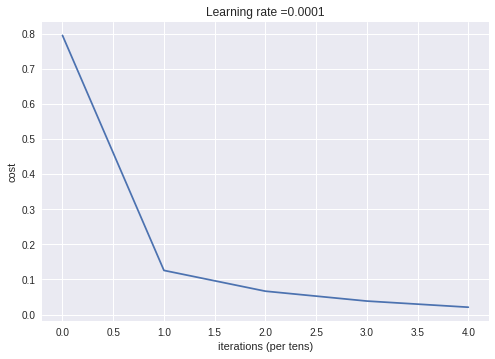

Parameters have been trained!


In [0]:

parameters = model(learning_rate=0.0001,num_epochs=25,minibatch_size=128,L2_lambd=0) #0.01